In [1]:
import numpy as np

nelx = 1
nely = 1
penal = 3

for ely in range(0,nely):
            for elx in range(0,nelx):
                n1 = (nely+1)*(elx-1)+ely-1 # index of upper left corner of the element
                n2 = (nely+1)* elx + ely-1  # index of upper right corner of the element
                edof = np.array([2*n1-2, 2*n1-1, 2*n2-2, 2*n2-1, 2*n2, 2*n2+1, 2*n1, 2*n1+1])
                print(edof)

[-8 -7 -4 -3 -2 -1 -6 -5]


In [2]:
from stiffness import stiffness 
from scipy.sparse import csr_matrix

K = csr_matrix((2*(nelx+1)*(nely+1), 2*(nelx+1)*(nely+1)))
KE = stiffness()
volfrac = 0.5
x = volfrac * np.ones((nely,nelx))
for elx in range(0, nelx):
    for ely in range(0, nely):
        print('elx:',elx)
        print('ely:',ely)
        n1 = (nely+1)*(elx) + ely
        n2 = (nely+1)*(elx+1) + ely
        print('n1:',n1)
        print('n2:',n2)
        edof = np.array([2*n1, 2*n1+1, 2*n2, 2*n2+1, 2*n2+2, 2*n2+3, 2*n1+2, 2*n1+3])
        print('edof:',edof)
        K[edof[:, None], edof] = K[edof[:, None], edof] + x[ely, elx]**penal * KE
        print(K) 



elx: 0
ely: 0
n1: 0
n2: 2
edof: [0 1 4 5 6 7 2 3]
  (0, 0)	0.06181318681318681
  (0, 1)	0.02232142857142857
  (0, 2)	0.006868131868131867
  (0, 3)	0.0017170329670329683
  (0, 4)	-0.03777472527472527
  (0, 5)	-0.0017170329670329683
  (0, 6)	-0.030906593406593404
  (0, 7)	-0.02232142857142857
  (1, 0)	0.02232142857142857
  (1, 1)	0.06181318681318681
  (1, 2)	-0.0017170329670329683
  (1, 3)	-0.03777472527472527
  (1, 4)	0.0017170329670329683
  (1, 5)	0.006868131868131867
  (1, 6)	-0.02232142857142857
  (1, 7)	-0.030906593406593404
  (2, 0)	0.006868131868131867
  (2, 1)	-0.0017170329670329683
  (2, 2)	0.06181318681318681
  (2, 3)	-0.02232142857142857
  (2, 4)	-0.030906593406593404
  (2, 5)	0.02232142857142857
  (2, 6)	-0.03777472527472527
  (2, 7)	0.0017170329670329683
  (3, 0)	0.0017170329670329683
  :	:
  (4, 7)	-0.0017170329670329683
  (5, 0)	-0.0017170329670329683
  (5, 1)	0.006868131868131867
  (5, 2)	0.02232142857142857
  (5, 3)	-0.030906593406593404
  (5, 4)	-0.02232142857142857
  (

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [9]:
F = csr_matrix((2*(nely+1)*(nelx+1), 1))
F[0] = -1
# fixeddofs = np.union1d(np.arange(0, 2*(nely+1), 1))
fixeddofs = np.arange(0, 2*(nely+1), 1)
alldofs = np.arange(0, 2*(nely+1)*(nelx+1))
freedofs = np.setdiff1d(alldofs, fixeddofs)

print('F:',F)

print('fixeddofs:',fixeddofs)
print('alldofs:',alldofs)
print('freedofs:',freedofs)

F:   (0, 0)	-1.0
fixeddofs: [0 1 2 3]
alldofs: [0 1 2 3 4 5 6 7]
freedofs: [4 5 6 7]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [4]:
np.arange(0, 2*(nely+1)*(nelx+1), 2)

array([0, 2, 4, 6])

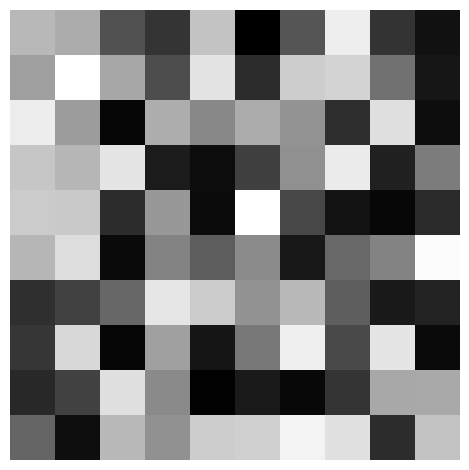

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example matrix x
x = np.random.rand(10, 10)  # Replace this with your actual matrix

# Plot the matrix
plt.imshow(-x, cmap='gray', aspect='equal')
plt.axis('off')  # Turn off axis
plt.tight_layout()  # Tight layout to minimize padding
plt.pause(1e-6)  # Pause for a brief moment
plt.show()  # Display the plot